In [1]:
import time
import sys
import os
from collections import OrderedDict
from importlib import reload

import h5py
import numpy as np
from matplotlib import pyplot as plt

%matplotlib notebook

In [2]:
import qcodes
qc = qcodes

# Basic configuration

In [3]:
%run -n init_vars.py
%run -n init_instruments.py
%run -n init_classes.py

GridData.autowrite_griddata = False

station = qcodes.Station(key, ivvi, RF, LO, alazar, fg)

ivvi.dac1.set_delay(0.001)
ivvi.dac1.set_step(20)
ivvi.dac6.set_delay(0.001)
ivvi.dac6.set_step(5)
ivvi.dac8.set_delay(0.001)
ivvi.dac8.set_step(5)
ivvi.dac12.set_delay(0.001)
ivvi.dac12.set_step(5)
ivvi.dac4.set_delay(0.001)
ivvi.dac4.set_step(5)
ivvi.dac7.set_delay(0.001)
ivvi.dac7.set_step(5)

2017-12-29 15:57:01,789 : measurement : INFO : Logger set up!


Initialized IVVI-rack in 0.09s


C:\Users\Administrator\Code\Qcodes\qcodes\instrument\parameter.py:209: UserWarning: Wrapping get method, original get method will not be directly accessible. It is recommended to define get_raw in your subclass instead.
  warnings.warn('Wrapping get method, original get method will not '


Connected to: Keysight Technologies 34465A (serial:MY57503596, firmware:A.02.14-02.40-02.14-00.49-03-01) in 0.66s
Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/110525, firmware:3.1.19.15-3.50.124.67) in 1.96s
Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/110524, firmware:3.1.19.15-3.50.124.67) in 1.98s
Connected to: Rigol Technologies DG4062 (serial:DG4E163251554, firmware:00.01.09) in 0.05s


C:\Users\Administrator\Code\Qcodes\qcodes\instrument\parameter.py:514: UserWarning: set_step is deprecated use step property as in `inst.step = stepvalue` instead
  "set_step is deprecated use step property as in `inst.step = "
C:\Users\Administrator\Code\Qcodes\qcodes\instrument\parameter.py:526: UserWarning: set_delay is deprecated use inter_delay or post_delay property as in `inst.inter_delay = delayvalue` instead
  "set_delay is deprecated use inter_delay or post_delay property "
C:\Users\Administrator\Code\Qcodes\qcodes\instrument\parameter.py:526: UserWarning: set_delay is deprecated use inter_delay or post_delay property as in `inst.inter_delay = delayvalue` instead
  "set_delay is deprecated use inter_delay or post_delay property "
C:\Users\Administrator\Code\Qcodes\qcodes\instrument\parameter.py:514: UserWarning: set_step is deprecated use step property as in `inst.step = stepvalue` instead
  "set_step is deprecated use step property as in `inst.step = "


# Experiments

## Test: alazar time trace

2017-12-29 15:57:12,494 : measurement : INFO : Ready to measure, file location: d:\data\2017-12\2017-12-29\2017-12-29_AlzTimeTrace-#0014...
C:\Users\Administrator\Code\Qcodes\qcodes\instrument\parameter.py:1097: UserWarning: MultiParameters do not support set at this time.
  warnings.warn('MultiParameters do not support set at this time.')


<IPython.core.display.Javascript object>


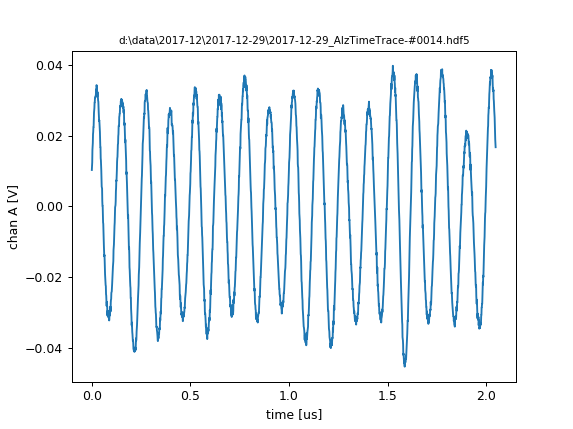

In [4]:
%run -i snippets/alazar_timetrace.py

## RF conductance on the bias resonator

In [5]:
station.ivvi.dac4(-905)
station.ivvi.dac5(-615)
station.ivvi.dac6(-850)

In [ ]:
# make sure we trigger externally
namespace.ats_settings['trigger_source1'] = 'EXTERNAL'

# set sampling rate of the alazar
namespace.ats_settings['sample_rate'] = int(1e8)

# set the funcgen frequency
# TODO: should be done automatically
station.fg.ch1_frequency(40)

# create measurement class and run
m = AWGGateSweep(station, namespace)
m.gate_pts(200)
m.ats_int_time(50e-6)
m.navgs(1)
m.IF(8e6)
m.sweep = [
    (m.station.ivvi.dac7, np.linspace(-2000, 2000, 101))
]
m.run()

In [ ]:
class AWGMeasurement(BaseMeasurement):
    
    def setup(self):
        self.awg_sequence()
        super().setup()
        
    
    def awg_sequence(self):
        raise NotImplementedError
      